<a href="https://colab.research.google.com/github/joon1002/aibootcamp/blob/main/sklearn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import gc

from tqdm.auto import tqdm

import sklearn

In [10]:
from sklearn.datasets import fetch_california_housing

# fetch_california_housing(as_frame=True)['frame']
# fetch_california_housing(as_frame=True)['data']
# fetch_california_housing(as_frame=True)['target']
# print(fetch_california_housing(as_frame=True)['DESCR'])
data = fetch_california_housing(as_frame=True)
data = data['frame']
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: xlabel='MedHouseVal', ylabel='Count'>

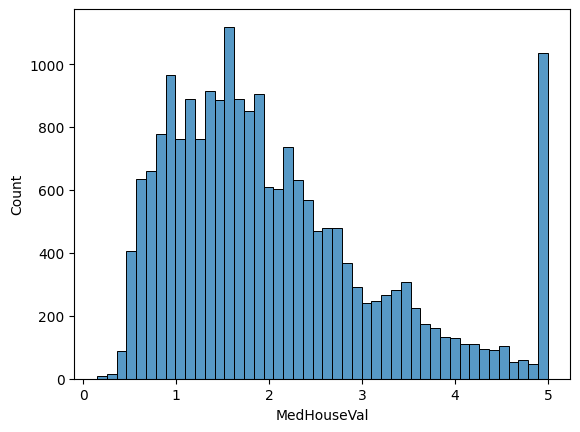

In [11]:
## EDA 수행 순서

# 1. info() 기본적인 크기 확인
# 2. 결측치 체크
# 3. dtype이 object인 column 확인 ---> categorical feature일 가능성이 높아서!
# 4. target value distribution 확인
#data.info()
sns.histplot(data=data, x="MedHouseVal")

In [13]:
# data preparation
X = data.drop(columns=["MedHouseVal"]) # feature vector
y = data.MedHouseVal                   # target value

# data split (train - val - test) = 8 : 1 : 1
from sklearn.model_selection import train_test_split

# 트테트테
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # reproducibility
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
# train - val = 8 : 1
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2064, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(18576, 8) (2064, 8) (18576,) (2064,)
(16512, 8) (2064, 8) (2064, 8) (16512,) (2064,) (2064,)


In [14]:
## sklearn에서의 학습 방법
# 1. 사용할 모델을 불러온다.
# 2. 모델을 선언한다.
# 3. fit

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
reg.coef_ # coefficient(weights, w)

array([ 4.43258189e-01,  9.82322371e-03, -1.09834193e-01,  6.48603590e-01,
       -5.32336210e-06, -4.08451479e-03, -4.16214121e-01, -4.26975016e-01])

In [17]:
reg.intercept_ # weight(b)

-36.24610125996265

In [19]:
# 검증
from sklearn.metrics import mean_squared_error  # MSE

train_preds = reg.predict(X_train)
preds = reg.predict(X_val)
print("Train RMSE : %.4f" % mean_squared_error(y_train,train_preds,squared=False))
# mean_squared_error(y_val, preds, squared=False) # Root Mean Squared Error(RMSE)
print("Validation RMSE : %.4f" %mean_squared_error(y_val,preds,squared=False))

Train RMSE : 0.7193
Validation RMSE : 0.7392
